# Data Science & Business Analytics at The Sparks Foundation 
**TASK 6 :Create the decision Tree Classifier and Visualize it Graphically**

**Aim:**
If we feed any new dataset to the classifier, it would be able to predict the right class accordingly.

**Decision tree methodology :**

Decision tree methodology is a commonly used data mining method for establishing classification systems based on multiple covariates or for developing prediction algorithms for a target variable

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
data=pd.read_csv('D:\Spark Foundation\Iris-task2.csv')
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Dropping unwanted variables**

In [3]:
data=data.drop('Id',axis=1)
data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#To find the number of rows and columns
data.shape

(150, 5)

In [5]:
#Describe the data
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#find null counts & data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#check null or missing values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
corr=data.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


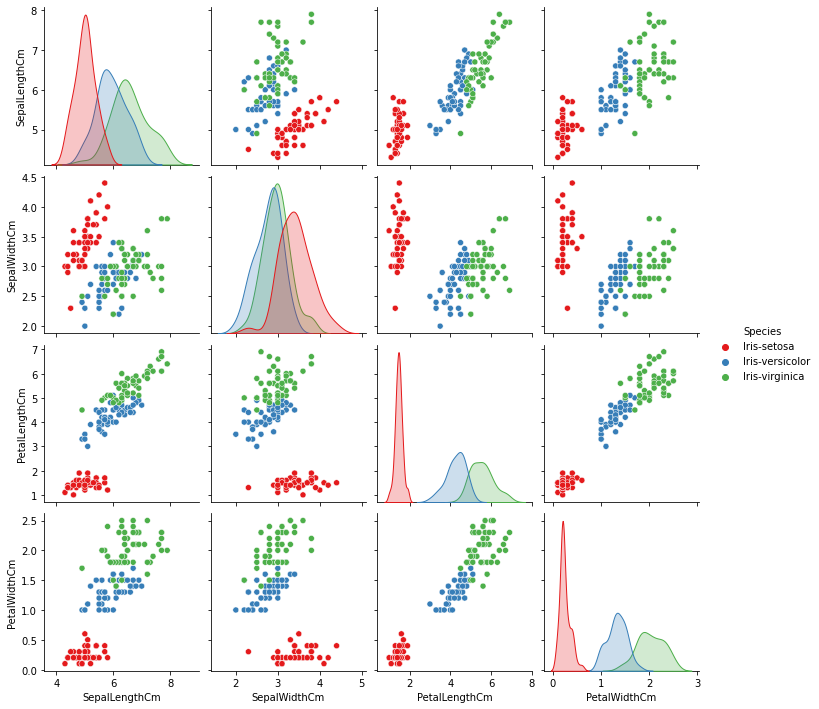

In [9]:
sns.pairplot(data , hue = 'Species', palette='Set1')

<AxesSubplot:>

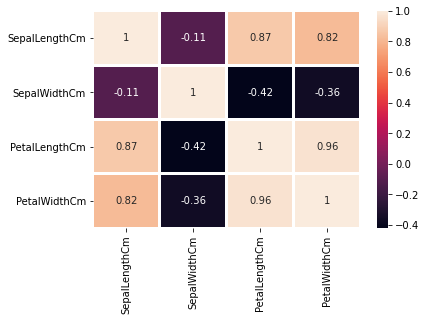

In [10]:
sns.heatmap(data.corr(), linewidths=2 , annot= True )

In [11]:
# Dividing into dependent variable and independent variable
X = data.drop(['Species'], axis = 1)
y = data['Species']

In [12]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**split the data into train and test set**

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=1)

**Model:Decision Tree Classifier**

In [14]:
from sklearn.tree import DecisionTreeClassifier

dtcmodel = DecisionTreeClassifier()
dtcmodel.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
dtcmodel.predict(X_test)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
print (pd.DataFrame(dtcmodel.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


                    Imp
PetalLengthCm  0.572012
PetalWidthCm   0.396653
SepalWidthCm   0.031335
SepalLengthCm  0.000000


**Visualize the Decision Tree**

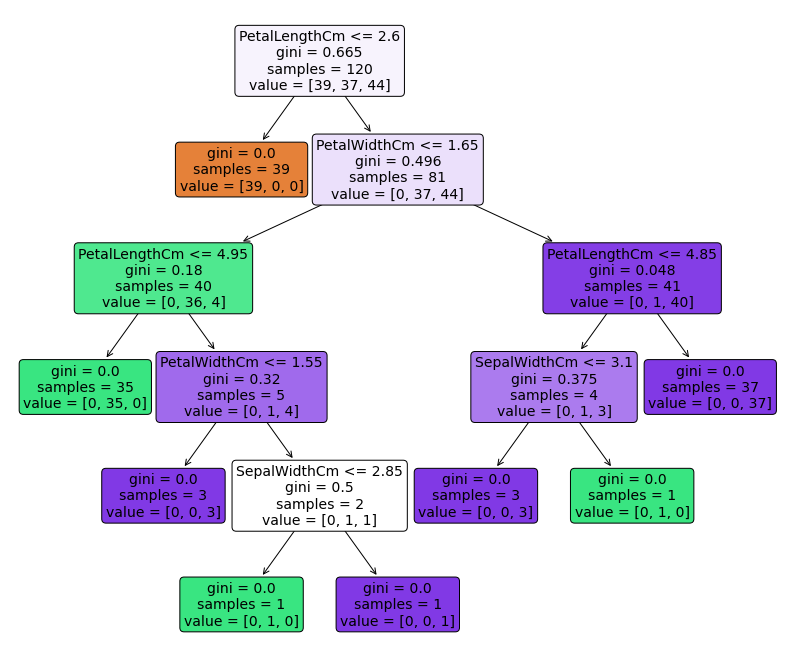

In [17]:
from sklearn import tree

plt.figure(figsize=(14,12))
dtree= tree.plot_tree(dtcmodel, feature_names = X.columns , fontsize = 14 , filled = True, rounded=True)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn import metrics

In [19]:
# Making Predictions
y_pred = dtcmodel.predict(X_test)

# Accuracy
print('Acuracy Score :\n', accuracy_score(y_test, y_pred))

# Confusion Matrix
print('\n Confusion Matrix :')
print(confusion_matrix(y_test, y_pred))


# Classification report
print('\n Classification Report :')
print(classification_report(y_test, y_pred))

Acuracy Score :
 0.9666666666666667

 Confusion Matrix :
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

 Classification Report :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [20]:
dtcmodel.predict([[5.7,3.1,4.4,0.4]])

array(['Iris-versicolor'], dtype=object)

In [21]:
dtcmodel.predict([[5.0,3.3,1.4,1.2]])

array(['Iris-setosa'], dtype=object)

In [22]:
dtcmodel.predict([[6.5,3.5,4.6,2.6]])

array(['Iris-versicolor'], dtype=object)

In [23]:
dtcmodel.predict([[6.2,3.1,5.4,2.3]])

array(['Iris-virginica'], dtype=object)

**Conclusion**

* Our Decision Tree classifier is ready to feed any new data now.

* The accuracy of Our Decision Tree classifier is 97% .

* Our Decision Tree classifier is a perfect classifier as it has a precison and recall both equal to 1.